In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
X = genfromtxt("X_train.csv", delimiter=',')
y = genfromtxt("y_train.csv", delimiter='')

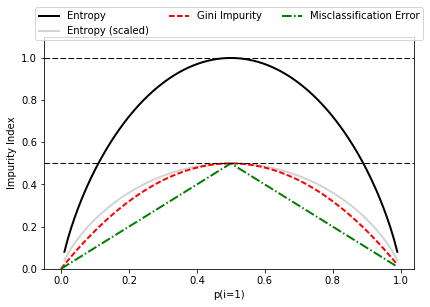

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.tight_layout()
#plt.savefig('./figures/impurity.png', dpi=300, bbox_inches='tight')
plt.show()

In [2]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
clf = clf.fit(X, y)

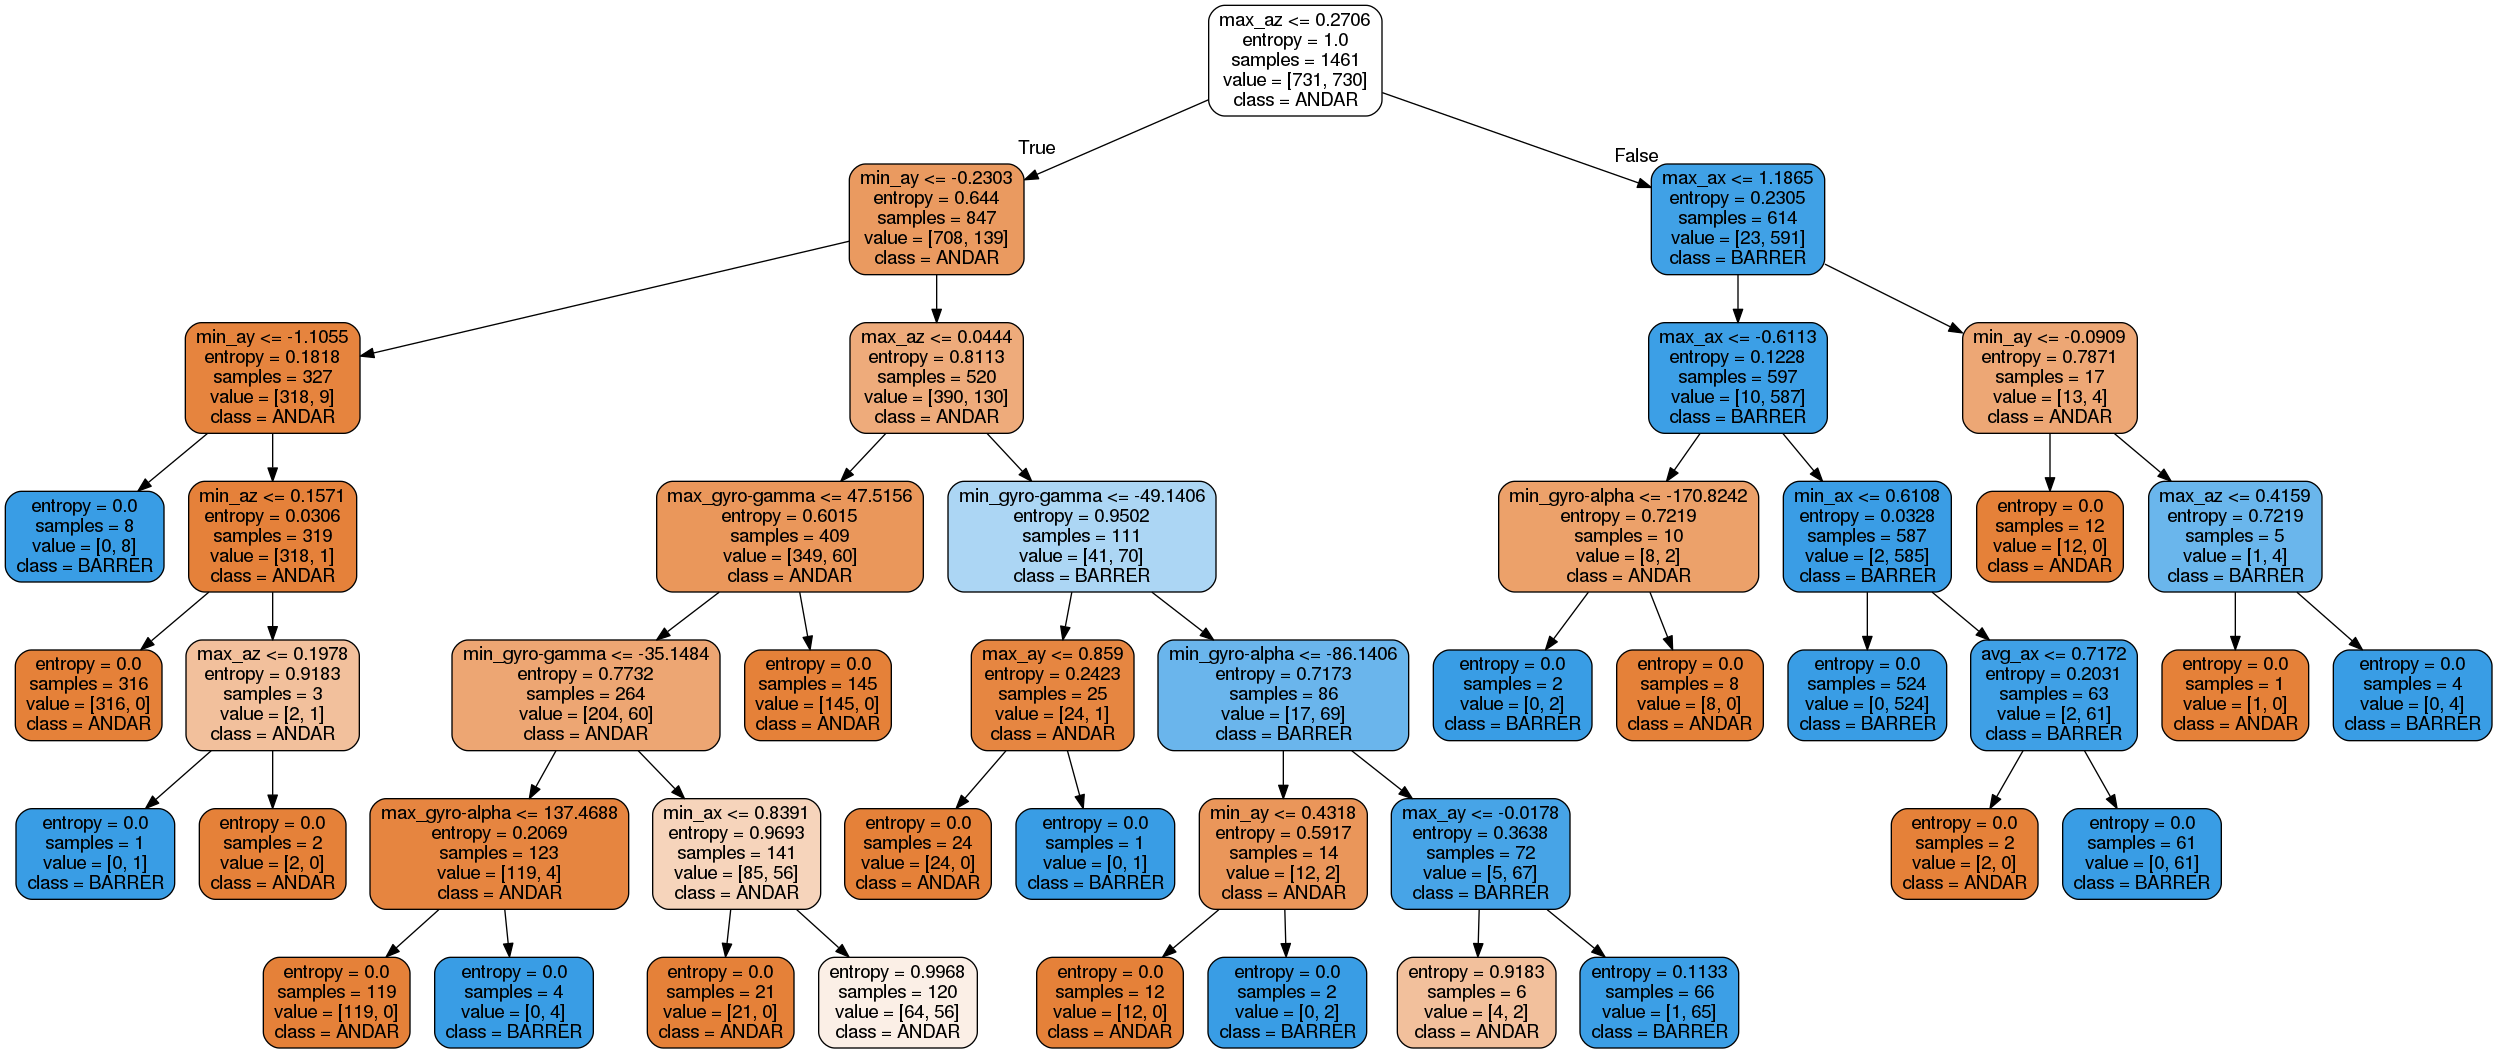

In [10]:
#Pintar aquí
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from IPython.display import Image
from IPython.display import display
from sklearn.tree import export_graphviz

if Version(sklearn_version) >= '0.18':
    
    try:
        
        import pydotplus
        
        dot_data = export_graphviz(
        clf, 
        out_file=None,
        # the parameters below are new in sklearn 0.18
        #feature_names=['A', 'B', 'C', 'D', 'E', 'F', 'G'], 
        feature_names=['avg_gyro-alpha', 'avg_gyro-beta', 'avg_gyro-gamma', 'avg_ax', 'avg_ay', 'avg_az', 'min_gyro-alpha', 'min_gyro-beta', 'min_gyro-gamma', 'min_ax', 'min_ay', 'min_az', 'max_gyro-alpha', 'max_gyro-beta', 'max_gyro-gamma', 'max_ax', 'max_ay', 'max_az'],
        class_names=['ANDAR', 'BARRER'],  
        filled=True,
        rounded=True)

        graph = pydotplus.graph_from_dot_data(dot_data)  
        display(Image(graph.create_png()))

    except ImportError:
        print('pydotplus is not installed.')

In [3]:
#Crear fichero dot para pasar a PDF con comandos
import pydotplus
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn.tree import export_graphviz
from sklearn import tree
export_graphviz(clf, 
                out_file='Customers.dot', 
                feature_names=['avg_gyro-alpha', 'avg_gyro-beta', 'avg_gyro-gamma', 'avg_ax', 'avg_ay', 'avg_az', 'min_gyro-alpha', 'min_gyro-beta', 'min_gyro-gamma', 'min_ax', 'min_ay', 'min_az', 'max_gyro-alpha', 'max_gyro-beta', 'max_gyro-gamma', 'max_ax', 'max_ay', 'max_az'],
                class_names=['ANDAR', 'BARRER'])

In [12]:
#Crea el PDF directamente del arbol
import pydotplus
from sklearn import tree
dot_data = tree.export_graphviz(clf, 
                                out_file=None,
                feature_names=['avg_gyro-alpha', 'avg_gyro-beta', 'avg_gyro-gamma', 'avg_ax', 'avg_ay', 'avg_az', 'min_gyro-alpha', 'min_gyro-beta', 'min_gyro-gamma', 'min_ax', 'min_ay', 'min_az', 'max_gyro-alpha', 'max_gyro-beta', 'max_gyro-gamma', 'max_ax', 'max_ay', 'max_az'],
                class_names=['ANDAR', 'BARRER'],
                               filled=True,
        rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("Customers.pdf") 

True

In [8]:
#Cross validation con "cv" segmentos
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(clf, X, y, cv = 5)*100
print(resultados) 

[ 97.95221843  91.43835616  87.32876712  84.5890411   70.20547945]


In [9]:
#Media de los resultados
np.mean(resultados)

86.302772453130132

In [8]:
#predice numero de clases??
clf.predict([[1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.,16.,17.,18.]])

array([ 3.])